## Credit Card Fraud Detection

### Problem Statement:

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

U:\Users\UK\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Basic Checks

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Data Understanding
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Checking for missing values

In [9]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Balancing of the dataset

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The Dataset is highly imbalanced

In [11]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [13]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
legit.Amount.describe().T

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe().T

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
# comparing the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
#Undersampling
#Building a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
legit_sample = legit.sample(n=492)

In [18]:
#concatenating
data = pd.concat([legit_sample, fraud], axis=0)

In [20]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
59192,48736.0,1.472455,-0.587724,-0.141169,-1.174009,-0.272318,0.269331,-0.717713,0.092801,-0.829374,...,-0.161134,-0.646963,-0.090867,-1.425808,0.413740,-0.389426,0.000112,-0.004971,15.00,0
177674,123287.0,0.083674,0.464375,0.636727,-0.714105,0.501098,0.326854,0.152817,0.056105,0.736643,...,0.230343,0.844906,-0.211203,0.084845,-0.167562,-0.292248,-0.039384,0.010540,4.99,0
73136,54995.0,1.126711,-0.009456,0.241820,1.224247,-0.097502,0.293374,-0.151733,0.252556,0.323977,...,-0.086990,-0.155801,-0.101245,-0.336039,0.613102,-0.304833,0.022256,0.000214,17.18,0
61824,50004.0,1.213546,0.337206,0.335287,0.572450,-0.270609,-0.735570,0.015957,-0.083368,-0.298358,...,-0.230548,-0.679471,0.110751,0.302105,0.202214,0.075521,-0.023852,0.021663,1.98,0
110121,71686.0,-0.735658,0.301208,1.287224,1.084842,1.446826,-0.708610,0.609192,-0.180199,-1.116386,...,0.223572,0.678990,-0.128946,0.261056,-0.058569,-0.251174,-0.038451,-0.082870,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [22]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
59192,48736.0,1.472455,-0.587724,-0.141169,-1.174009,-0.272318,0.269331,-0.717713,0.092801,-0.829374,...,-0.161134,-0.646963,-0.090867,-1.425808,0.413740,-0.389426,0.000112,-0.004971,15.00,0
177674,123287.0,0.083674,0.464375,0.636727,-0.714105,0.501098,0.326854,0.152817,0.056105,0.736643,...,0.230343,0.844906,-0.211203,0.084845,-0.167562,-0.292248,-0.039384,0.010540,4.99,0
73136,54995.0,1.126711,-0.009456,0.241820,1.224247,-0.097502,0.293374,-0.151733,0.252556,0.323977,...,-0.086990,-0.155801,-0.101245,-0.336039,0.613102,-0.304833,0.022256,0.000214,17.18,0
61824,50004.0,1.213546,0.337206,0.335287,0.572450,-0.270609,-0.735570,0.015957,-0.083368,-0.298358,...,-0.230548,-0.679471,0.110751,0.302105,0.202214,0.075521,-0.023852,0.021663,1.98,0
110121,71686.0,-0.735658,0.301208,1.287224,1.084842,1.446826,-0.708610,0.609192,-0.180199,-1.116386,...,0.223572,0.678990,-0.128946,0.261056,-0.058569,-0.251174,-0.038451,-0.082870,1.00,0


In [23]:
data.shape

(984, 31)

In [26]:
data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [25]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97173.719512,0.080454,0.034007,-0.005591,0.086949,-0.038626,-0.012756,0.029046,0.005757,0.056340,...,0.019439,-0.032254,0.058510,-0.062255,-0.016051,0.023646,-0.005294,0.011272,-0.013161,95.856016
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Explanatory Data Analysis

#### Visualizations

Class
0    50.0
1    50.0
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

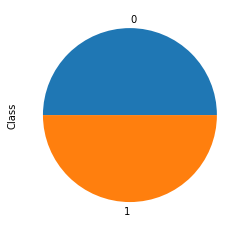

In [33]:
#checking the distribution of the target variable 
print((data.groupby('Class')['Class'].count()/data['Class'].count())*100)
((data.groupby('Class')['Class'].count()/data['Class'].count())*100).plot.pie()

In [34]:
# checking the % distributions of normal vs fraud
classes=data['Class'].value_counts()
normal_share=classes[0]/data['Class'].count()*100
fraud_share=classes[1]/data['Class'].count()*100

print(normal_share)
print(fraud_share)

50.0
50.0


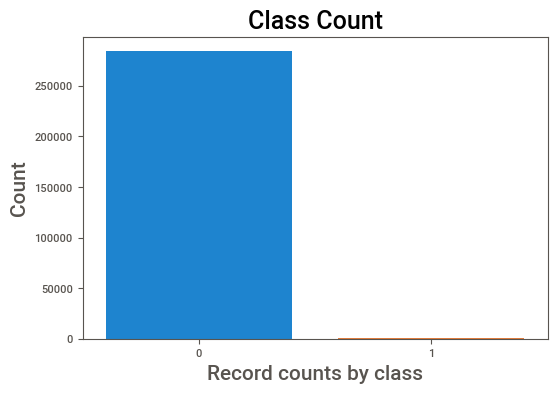

In [20]:
# create bar plot for number and percentage of fraudulent vs non - fraudulent transactions
plt.figure(figsize=(6,4))
sns.countplot(df['Class'])
plt.title("Class Count",fontsize=18)
plt.xlabel("Record counts by class",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [35]:
#checking the correlation
corr = data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.255823,-0.237665,0.158687,-0.240051,0.295051,0.135601,0.232814,-0.135077,0.186398,...,-0.057364,0.133941,0.056700,0.022971,-0.183167,-0.017555,-0.132923,0.004304,0.018681,-0.172001
V1,0.255823,1.000000,-0.824438,0.882291,-0.607346,0.867911,0.317895,0.886510,-0.083489,0.664398,...,0.016903,-0.029671,-0.039179,-0.081068,-0.064627,0.052390,0.191646,0.199601,-0.021893,-0.440461
V2,-0.237665,-0.824438,1.000000,-0.869141,0.681579,-0.799258,-0.291077,-0.857655,-0.015847,-0.706957,...,0.042761,-0.020655,0.158280,0.011301,0.108877,-0.001897,-0.172371,0.021325,-0.216149,0.492879
V3,0.158687,0.882291,-0.869141,1.000000,-0.769220,0.852927,0.468939,0.887551,-0.172238,0.766117,...,0.025254,-0.049288,-0.029920,0.006184,-0.065445,-0.020662,0.101493,0.121246,-0.009675,-0.565778
V4,-0.240051,-0.607346,0.681579,-0.769220,1.000000,-0.579575,-0.426422,-0.708693,0.099935,-0.793098,...,-0.017112,0.111939,0.020482,-0.047189,-0.053451,0.143193,-0.008506,-0.055409,0.005502,0.701765
V5,0.295051,0.867911,-0.799258,0.852927,-0.579575,1.000000,0.285233,0.844505,-0.204300,0.659234,...,0.045147,-0.087667,-0.058633,-0.143422,-0.063778,0.064641,0.183629,0.164382,-0.114090,-0.371245
V6,0.135601,0.317895,-0.291077,0.468939,-0.426422,0.285233,1.000000,0.285867,-0.583219,0.381136,...,0.009283,0.022696,0.231690,-0.039801,-0.145218,-0.068647,-0.153074,-0.055349,0.194156,-0.405155
V7,0.232814,0.886510,-0.857655,0.887551,-0.708693,0.844505,0.285867,1.000000,0.085201,0.765947,...,0.039823,-0.107446,-0.102241,-0.050931,0.047987,0.027280,0.235725,0.127417,0.127057,-0.478014
V8,-0.135077,-0.083489,-0.015847,-0.172238,0.099935,-0.204300,-0.583219,0.085201,1.000000,-0.075863,...,-0.101980,0.025892,-0.349478,0.070869,0.239281,0.043173,0.277666,-0.003334,-0.004033,0.058013
V9,0.186398,0.664398,-0.706957,0.766117,-0.793098,0.659234,0.381136,0.765947,-0.075863,1.000000,...,0.148800,-0.232181,-0.052898,0.010475,-0.002202,-0.128388,0.115954,0.087764,0.030281,-0.565130


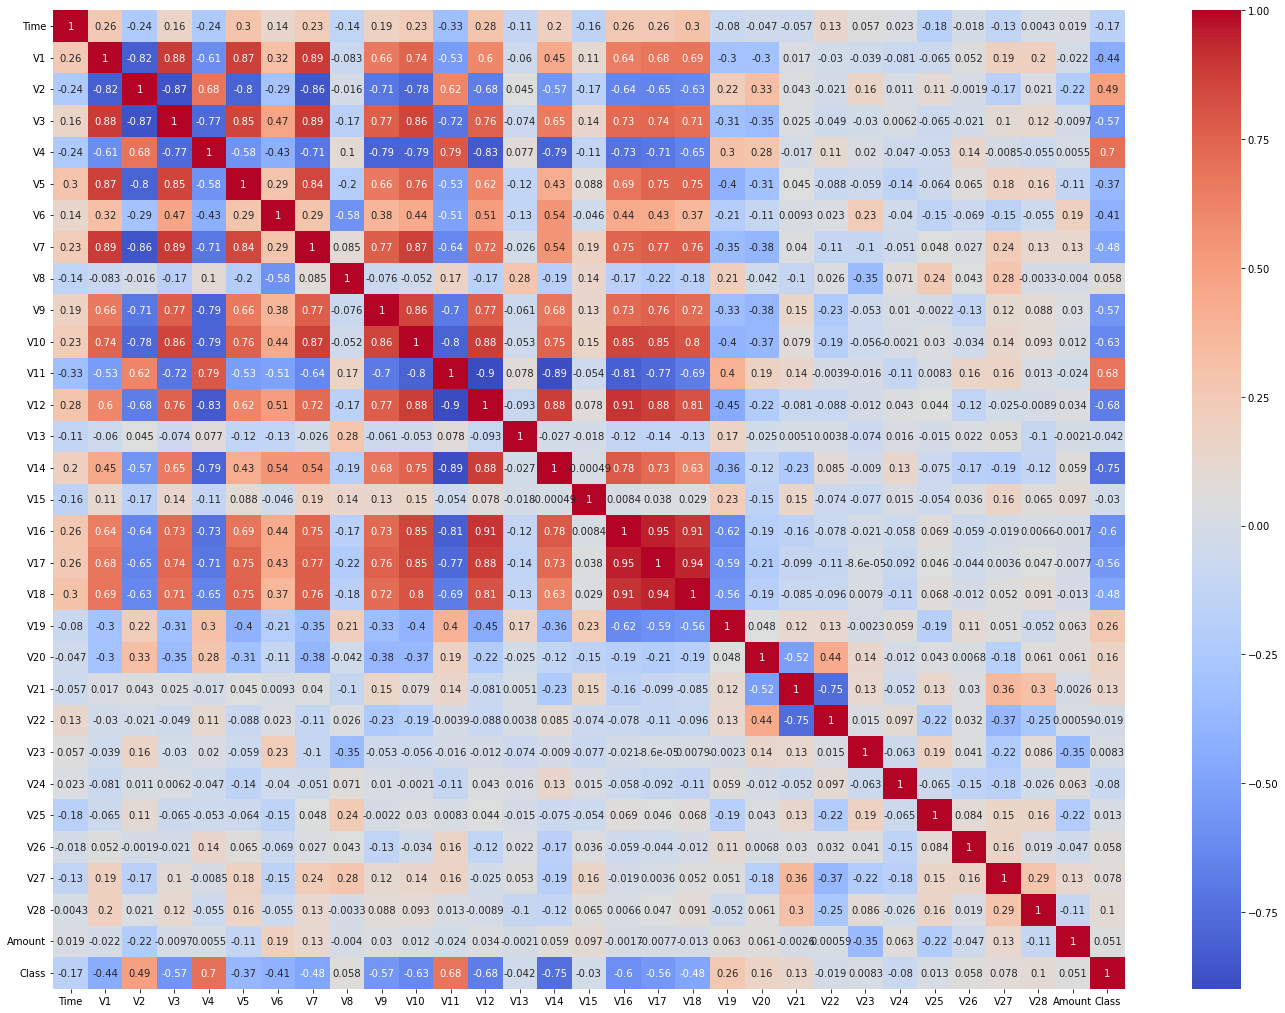

In [36]:
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

### Splitting the data into train and test data

In [30]:
X = data.drop(columns='Class', axis=1)
y = data['Class']

In [31]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
59192,48736.0,1.472455,-0.587724,-0.141169,-1.174009,-0.272318,0.269331,-0.717713,0.092801,-0.829374,...,0.115559,-0.161134,-0.646963,-0.090867,-1.425808,0.413740,-0.389426,0.000112,-0.004971,15.00
177674,123287.0,0.083674,0.464375,0.636727,-0.714105,0.501098,0.326854,0.152817,0.056105,0.736643,...,-0.094327,0.230343,0.844906,-0.211203,0.084845,-0.167562,-0.292248,-0.039384,0.010540,4.99
73136,54995.0,1.126711,-0.009456,0.241820,1.224247,-0.097502,0.293374,-0.151733,0.252556,0.323977,...,-0.265420,-0.086990,-0.155801,-0.101245,-0.336039,0.613102,-0.304833,0.022256,0.000214,17.18
61824,50004.0,1.213546,0.337206,0.335287,0.572450,-0.270609,-0.735570,0.015957,-0.083368,-0.298358,...,-0.039011,-0.230548,-0.679471,0.110751,0.302105,0.202214,0.075521,-0.023852,0.021663,1.98
110121,71686.0,-0.735658,0.301208,1.287224,1.084842,1.446826,-0.708610,0.609192,-0.180199,-1.116386,...,0.292893,0.223572,0.678990,-0.128946,0.261056,-0.058569,-0.251174,-0.038451,-0.082870,1.00


In [32]:
y

59192     0
177674    0
73136     0
61824     0
110121    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.20) 

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((787, 30), (197, 30), (787,), (197,))

### Model Building

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
model = LogisticRegression()

In [44]:
model.fit(X_train, y_train)

LogisticRegression()

#### Model Evaluation

In [46]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [47]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9377382465057179


In [49]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [50]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


#### Other classification metrics

In [52]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix

In [54]:
train_accuracy = accuracy_score(X_train_prediction,y_train)
print("Training accuracy in terms of other metrics",train_accuracy*100)
print("Classification report: \n",classification_report(X_train_prediction,y_train))

Training accuracy in terms of other metrics 93.7738246505718
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       401
           1       0.92      0.96      0.94       386

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



In [55]:
test_accuracy = accuracy_score(X_test_prediction,y_test)
print("Testing accuracy of support vector classifier model",test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(X_test_prediction,y_test))

Testing accuracy of support vector classifier model 92.89340101522842
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       110
           1       0.90      0.94      0.92        87

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

